## E-learning project

анализ образовательной платформы на основе данных о завершенных уроках

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных и EDA

Таблица **courses** — список предметов по семестрам
 - code_module — идентификационный код предмета
 - code_presentation — идентификационный код семестра
 - module_presentation_length — продолжительность семестра в днях

In [2]:
courses = pd.read_csv('courses.csv')

In [3]:
courses.head(3)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268


In [4]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [5]:
# сколько предметов на платформе
courses.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [6]:
# сколько семестров
courses.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

Таблица **assessments** - информация об оценках

! Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

- code_module — идентификационный код предмета
- code_presentation — идентификационный код семестра
- id_assessment — идентификационный код теста
- assessment_type — тип теста (TMA - оценка преподавателя, СМА - компьютерная оценка, Exam - экзамен по курсу)
- date — количество дней с момента начала семестра до даты окончательной сдачи теста
- weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [7]:
assessments = pd.read_csv('assessments.csv')

In [8]:
assessments.head(3)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0


In [9]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Имеются тесты, по которым отсутствует дата окончательной сдачи. Смотрю на них подробнее. 

In [10]:
# смотрю на тесты с пустыми датами сдачи
assessments.query('date.isna() == True')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Все эти предметы - экзамены. Возможно, они не проводились, либо срок сдачи для них не предусмотрен.

Таблица **studentAssessment** — результаты тестов студентов. 

- id_assessment — идентификационный код теста
- id_student — идентификационный номер студента
- date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра
- is_banked — факт перезачета теста с прошлого семестра (для студентов, вернувшихся из академического отпуска)
- score — оценка учащегося в этом тесте в формате от 0 до 100 баллов
 
! Оценка ниже 40 неудачная/неуспешная сдача теста.
 
! Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

In [11]:
studentAssessment = pd.read_csv('studentAssessment.csv')

In [12]:
studentAssessment.head(3)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0


In [13]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Имеются строки без оценок. Смотрю на них подробнее. 

In [14]:
studentAssessment.query('score.isna() == True')

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [15]:
# проверю каким типам тестов ('assessment_type') соответствуют пропуски
studentAssessment.query('score.isna() == True') \
    .merge(assessments, on='id_assessment') \
    .assessment_type.value_counts()

TMA    173
Name: assessment_type, dtype: int64

Все эти тесты оцениваются преподавателем - возможно, их не проверяли, или не внесли оценку по ошибке. 

Результатов без оценок всего 173 - не так много, по сравнению с общим количеством оценок (173912). 

In [16]:
# сколько перезачетов с прошлого семестра
studentAssessment.is_banked.sum()

1909

Таблица **studentRegistration** - информация о времени, когда студент зарегистрировался для прохождения курса в семестре.
 
- code_module — идентификационный код предмета
- code_presentation — идентификационный код семестра
- id_student — идентификационный номер студента
- date_registration — количество дней от начала семестра до даты регистрации студента
- date_unregistration — дата отмены регистрации студента с предмета; у студентов, окончивших курс, это поле остается пустым.

In [17]:
studentRegistration = pd.read_csv('studentRegistration.csv')

In [18]:
studentRegistration.head(3)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0


In [19]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [20]:
# всего уникальных студентов зарегистировано
studentRegistration.id_student.nunique()

28785

Пропуски в столбце 'date_unregistration' - студенты, закончившие курс.

Пропуски в столбце 'date_registration' - возможно, ошибки в записи данных. 

### Задача 1: cколько студентов успешно сдали только один курс?

 Для решения задачи необходимо сформулировать, что должно считаться курсом. 
 
 **КУРС** - это:
 
     - предмет в определенном семестре - эту информацию предлагаю отразить в уникальном идентификаторе;
     - на котором учился (зарегистрировался, и не отменил регистрацию) хотя бы один студент.

In [21]:
# в таблицы добавлю столбец 'id_course' - уникальный идентификатор курса
courses['id_course'] = courses.code_module + courses.code_presentation
assessments['id_course'] = assessments.code_module + assessments.code_presentation
studentRegistration['id_course'] = studentRegistration.code_module + studentRegistration.code_presentation

In [22]:
# на какие курсы зарегистрировались и окончили курс (не отменили регистрацию) студенты
regs_by_courses = studentRegistration \
    .query('date_unregistration.isna() == True') \
    .groupby('id_course', as_index=False) \
    .agg({'id_student':'count'})
regs_by_courses.head()

,id_course,id_student
0,AAA2013J,323
1,AAA2014J,299
2,BBB2013B,1262
3,BBB2013J,1590
4,BBB2014B,1124


In [23]:
# проверяю, для всех ли курсов на платформе имеются неотмененные регистрации
regs_by_courses.id_course.isin(courses.id_course).value_counts()

True    22
Name: id_course, dtype: int64

Можно сделать вывод, что на всех 22 курсах есть студенты, которые зарегистрирвались и закончили курс.

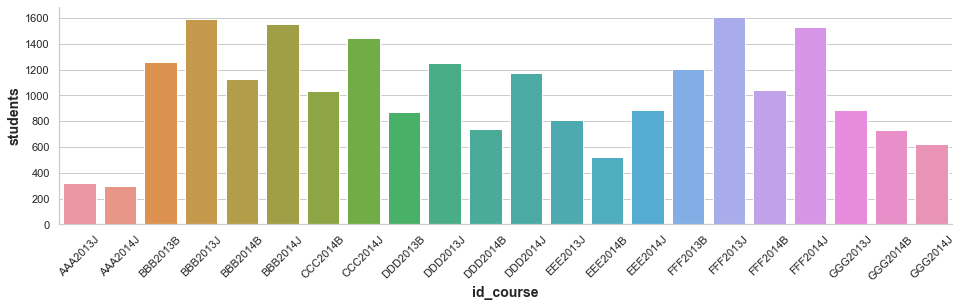

In [24]:
# визуализируем количество регистраций на курс
sns.set(style='whitegrid', rc={'figure.figsize':(16, 4)})
ax = sns.countplot(data=studentRegistration.query('date_unregistration.isna() == True'), x='id_course')

ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('id_course', fontsize = 14, fontweight ='bold')
ax.set_ylabel('students', fontsize = 14, fontweight ='bold')
sns.despine()

Успешная сдача — это зачёт по курсу на экзамене. Исхдя их описания данных, оценку за экзамен 40 и более баллов считаю успешной сдачей курса. 

In [25]:
# достану id всех экзаменов
exams_id = assessments.query('assessment_type == "Exam"').id_assessment

In [26]:
# создам таблицу со всеми результатами экзаменов
exams_results = studentAssessment.query('id_assessment in @exams_id')

In [27]:
# создам таблицу только с успешными сдачами экзаменов
exams_success = studentAssessment.query('id_assessment in @exams_id & score >= 40')

In [28]:
# считаю количество успешных оценок за экзамен с разбивкой по 'id_student', смотрю какие варианты есть
exams_success \
    .groupby('id_student', as_index=False) \
    .agg({'id_assessment':'count'}) \
    .id_assessment.value_counts()

1    3802
2     295
Name: id_assessment, dtype: int64

**Ответ**: только один курс успешно сдали **3802** студента.

### Задача 2: выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью

! завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [29]:
# подсчитаю все оценки с разбивкой по экзамену 'id_assessment'
exams_by_assessment = exams_results \
    .groupby('id_assessment', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'all_scores'})
exams_by_assessment

,id_assessment,all_scores
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [30]:
# таким же образом подсчитаю только успешные сдачи экзаменов  
success_exams_by_assessment = exams_success \
    .groupby('id_assessment', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'success_scores'})
success_exams_by_assessment

,id_assessment,success_scores
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [31]:
# объединяю таблицы с оценками с разбивкой по экзамену
exams_by_assessment = exams_by_assessment.merge(success_exams_by_assessment, on='id_assessment')
exams_by_assessment

,id_assessment,all_scores,success_scores
0,24290,747,664
1,24299,1168,1019
2,25340,602,504
3,25354,968,878
4,25361,524,485
5,25368,950,842


In [32]:
# добавлю в таблицу exams_result столбец 'finality', отражающий завершаемость каждого экзамена
exams_by_assessment['finality'] = (100 *  \
    exams_by_assessment.success_scores/exams_by_assessment.all_scores) \
    .round(2)
exams_by_assessment.sort_values('finality')

,id_assessment,all_scores,success_scores,finality
2,25340,602,504,83.72
1,24299,1168,1019,87.24
5,25368,950,842,88.63
0,24290,747,664,88.89
3,25354,968,878,90.70
4,25361,524,485,92.56


**Ответ**: 
    - id самого сложного экзамена - 25340, курс DDD2013B, завершаемость: 83.72%
    - id самого простого экзамена - 25361, курс DDD2014B, завершаемость: 92.56%

### Задача 3: определить средний срок сдачи экзаменов по каждому предмету

! под сдачей понимаем последнее успешное прохождение экзамена студентом

! при расчете надо исключить перезачеты

In [33]:
# сначала сгруппирую данные по экзамену и студенту, а в агрегирующей функции возьму максимальную дату,
# затем добавлю информацию о курсе, сгруппирую по предмету и рассчитаю средний срок сдачи
exams_success \
    .groupby(['id_assessment','id_student'], as_index=False) \
    .agg({'date_submitted':'max'}) \
    .merge(assessments, on='id_assessment') \
    .groupby(['code_module'], as_index=False) \
    .agg({'date_submitted':'mean'}) \
    .round(2)

,code_module,date_submitted
0,CCC,239.35
1,DDD,237.98


**Ответ:**

 - Среднее время сдачи экзаменов по предмету ССС - 239.35 дней
 - Среднее время сдачи экзаменов по предмету DDD - 237.98 дней

### Задача 4: выявить ТОП-3 самых популярных предметов по количеству регистраций на них, а также предметов с самым большим оттоком.

! учесть пропуски

! учесть факт множественной регистрации студентов на один предмет 

In [34]:
# группирую регистрации по предмету, смотрю какой столбец лучше взять для расчета
regs_by_module = studentRegistration \
    .groupby('code_module', as_index=False) \
    .agg({'id_student':'nunique', 'date_registration': 'count'}) \
    .rename(columns={'id_student':'unique_regs', 'date_registration':'dates_count'})
regs_by_module

,code_module,unique_regs,dates_count
0,AAA,712,748
1,BBB,7692,7900
2,CCC,4251,4426
3,DDD,5848,6257
4,EEE,2859,2932
5,FFF,7397,7751
6,GGG,2525,2534


Для всех предметов в таблице регистраций больше, чем студентов - значит, некоторые студенты регистрировались на один и тот же предмет несколько раз - возможно, в разные семестры. 
Считаю, что популярность предметов лучше оценивать по уникальным пользователям (студентам), поэтому для расчета топ-3 буду использовать столбец 'id_student'. И пропуски в столбце с датами можно не удалять. 

In [35]:
# топ-3 предметов по количеству регистраций
regs_by_module.sort_values('unique_regs', ascending = False).head(3)

,code_module,unique_regs,dates_count
1,BBB,7692,7900
5,FFF,7397,7751
3,DDD,5848,6257


Отток  (CR) буду расчитывать как процентное отношение студентов, отменивших регистрацию (date_unregistration !=0) и всех студентов, прошедших регистрацию. Расчет также буду проводить по уникальным студентам.  

In [36]:
# аналогичная группировка, только для строк с отменами регистраций
unregs_by_module = studentRegistration \
    .query('date_unregistration.isna() == False') \
    .groupby('code_module', as_index=False) \
    .agg({'id_student':'nunique'}) \
    .rename(columns={'id_student':'unique_unregs'})
unregs_by_module

,code_module,unique_unregs
0,AAA,116
1,BBB,2314
2,CCC,1858
3,DDD,2065
4,EEE,693
5,FFF,2249
6,GGG,287


In [37]:
# объединяю две таблицы
regs_by_module = regs_by_module.merge(unregs_by_module, on='code_module')
regs_by_module

,code_module,unique_regs,dates_count,unique_unregs
0,AAA,712,748,116
1,BBB,7692,7900,2314
2,CCC,4251,4426,1858
3,DDD,5848,6257,2065
4,EEE,2859,2932,693
5,FFF,7397,7751,2249
6,GGG,2525,2534,287


In [38]:
# добавлю столбец CR (churn rate)
regs_by_module = regs_by_module.assign(CR = 100 * regs_by_module.unique_unregs / regs_by_module.unique_regs)

In [39]:
# # топ-3 предметов по CR
regs_by_module.sort_values('CR', ascending = False).round(2).head(3)

,code_module,unique_regs,dates_count,unique_unregs,CR
2,CCC,4251,4426,1858,43.71
3,DDD,5848,6257,2065,35.31
5,FFF,7397,7751,2249,30.40


**Ответ**: 

    топ-3 предметов по количеству регистраций: BBB, FFF, CCC
    топ-3 предметов с самым большим оттоком: CCC, DDD, FFF

### Задача 5: выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов в период с начала 2013 по конец 2014.

! завершаемость курса = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [40]:
# считаю все результаты за экзамены с разбивкой по семестру
exams_by_semester = exams_results \
    .merge(assessments, on='id_assessment') \
    .groupby('code_presentation', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'all_scores'})
exams_by_semester

,code_presentation,all_scores
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


In [41]:
# считаю только успешные сдачи экзаменов с разбивкой по семестру
success_exams_by_semester = exams_success \
    .merge(assessments, on='id_assessment') \
    .groupby('code_presentation', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'success_scores'})
success_exams_by_semester

,code_presentation,success_scores
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [42]:
# объединяю подсчеты
exams_by_semester = exams_by_semester.merge(success_exams_by_semester, on='code_presentation')

In [43]:
# считаю завершаемость по семестрам и выбираю семестр с самой низкой завершаемостью
exams_by_semester['finality'] = round(exams_by_semester.success_scores/exams_by_semester.all_scores*100, 2)
exams_by_semester.sort_values('finality').head(3)

,code_presentation,all_scores,success_scores,finality
0,2013B,602,504,83.72
3,2014J,2118,1861,87.87
2,2014B,1271,1149,90.40


In [44]:
# считаю среднее время до успешной сдачи экзамена с разбивкой по семестрам, 
# и выбираю семестр с максимальным значением
exams_success \
    .merge(assessments, on='id_assessment') \
    .groupby(['code_presentation'], as_index=False) \
    .agg({'date_submitted':'mean'}) \
    .round(2) \
    .rename(columns={'date_submitted':'mean_days'}) \
    .sort_values('mean_days', ascending = False)\
    .head(3)

,code_presentation,mean_days
3,2014J,243.68
1,2013J,239.51
2,2014B,233.00


**Ответ**

    семестр с самой низкой завершаемостью - 2013B;
    семетр с самыми долгими средними сроками сдачи - 2014J.


### Задача 6: Построить адаптированные RFM-кластеры студентов.

В адаптированной кластеризации использую следующие метрики: 
-  R - среднее время сдачи одного экзамена, 
-  F - завершаемость курсов, 
-  M - среднее количество баллов, получаемое за экзамен. 

In [45]:
# таблицу со всеми результатами экзаменов группирую по студентам, считаю средний срок сдачи и количество оценок
rfm_exams = exams_results \
    .groupby('id_student',as_index=False) \
    .agg({'date_submitted':'mean', 'score':'count'}) \
    .rename(columns={'date_submitted':'recency', 'score':'all_scores'})

In [46]:
# аналогичным способом для каждого студента считаю количество только успешных сдач экзамена
success_scores_by_students = exams_success \
    .groupby('id_student', as_index=False) \
    .agg({'score':'count'}) \
    .rename(columns={'score':'success_scores'})
success_scores_by_students.head()

,id_student,success_scores
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [47]:
# объединяю таблицы методом left join - чтобы сохранить тех, кто не сдал экзамен
rfm_exams = rfm_exams.merge(success_scores_by_students, how='left', on='id_student')

In [48]:
# добавляю столбец с завершаемостью
rfm_exams['frequency'] = (100 * rfm_exams.success_scores / rfm_exams.all_scores).round(2)

In [49]:
# считаю среднюю оценку для каждого студента - включая незачеты по экзамену, т. е. по всем результатам
all_scores_by_student = exams_results \
    .groupby(['id_student'], as_index=False)\
    .agg({'score':'mean'}) \
    .rename(columns={'score':'monetary'})

In [50]:
# добавляю новую метрику в основную таблицу, заполняю все пропуски от джойнов
rfm_exams = rfm_exams \
    .merge(all_scores_by_student, how='left', on='id_student')\
    .fillna(0)
rfm_exams.head(3)

,id_student,recency,all_scores,success_scores,frequency,monetary
0,23698,243.0,1,1.0,100.0,80.0
1,24213,236.0,1,1.0,100.0,58.0
2,27116,243.0,1,1.0,100.0,96.0


In [51]:
# оставлю только нужные столбцы
rfm_exams = rfm_exams[['id_student', 'recency', 'frequency', 'monetary']]

In [52]:
# смотрю на характеристики метрик
rfm_exams.describe()

,id_student,recency,frequency,monetary
count,4.633000e+03,4633.000000,4633.000000,4633.000000
mean,7.256904e+05,238.462227,88.128642,65.117958
std,5.753498e+05,5.653378,32.114175,20.470561
min,2.369800e+04,229.000000,0.000000,0.000000
25%,5.011580e+05,234.000000,100.000000,50.000000
50%,5.884820e+05,241.000000,100.000000,66.000000
75%,6.463510e+05,243.000000,100.000000,82.000000
max,2.698251e+06,285.000000,100.000000,100.000000


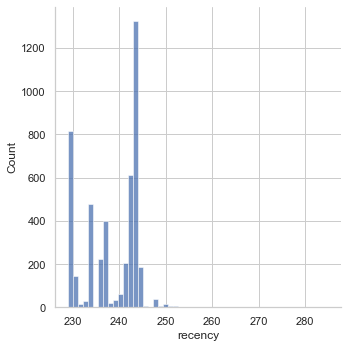

In [53]:
sns.displot(rfm_exams.recency)

**Recency** (среднее время сдачи) распределяется в диапазоне от 230 до 285. Считаю, что достаточно разделить эту метрику на два сегмента при помощи медианы (так как распределение не симметрично):

    1 - неспешный
    2 - быстрый

In [54]:
# функция для расчета r_score
def r_score(x):
    if x <= rfm_exams.recency.median():
        return 2
    else:
        return 1

In [55]:
# смотрю какие есть значения завершаемости
rfm_exams['frequency'].value_counts()

100.0    4069
0.0       536
50.0       28
Name: frequency, dtype: int64

Метрика **frequency** (завершаемость) принимает всего три значения, их и использую для разделения:

    1 - не завершил
    2 - завершил половину
    3 - завершил все

In [56]:
# функция для расчета f_score
def f_score(x):
    if x < 50:
        return 1
    elif 50 <= x < 100:
        return 2
    else:
        return 3

Метрику **monetary** (средний балл за экзамены) разделю также на три сегмента, руководствуясь простой логикой:

    1 - менее 40 баллов - отстающий
    2 - 40-80 баллов - хорошист
    3 - более 80 баллов - отличник

In [57]:
# функция для расчета m_score
def m_score(x):
    if x < 40:
        return 1
    elif 40 <= x <=80:
        return 2
    elif x > 80:
        return 3

In [58]:
# расчитываю для каждого студента баллы
rfm_exams['R'] = rfm_exams['recency'].apply(lambda x: r_score(x))
rfm_exams['F'] = rfm_exams['frequency'].apply(lambda x: f_score(x))
rfm_exams['M'] = rfm_exams['monetary'].apply(lambda x: m_score(x))

In [59]:
# добавляем столбец с rfm_score для каждого студента
rfm_exams['rfm_score'] = rfm_exams['R'].map(str) + rfm_exams['F'].map(str) + rfm_exams['M'].map(str)
rfm_exams.head() 

,id_student,recency,frequency,monetary,R,F,M,rfm_score
0,23698,243.0,100.0,80.0,1,3,2,132
1,24213,236.0,100.0,58.0,2,3,2,232
2,27116,243.0,100.0,96.0,1,3,3,133
3,28046,237.0,100.0,40.0,2,3,2,232
4,28787,243.0,100.0,44.0,1,3,2,132


In [60]:
# смотрю какие rfm_score имеются и по сколько 
rfm_exams.rfm_score.value_counts()

232    1555
132    1325
133     611
233     578
211     269
111     267
222      18
221       6
122       3
121       1
Name: rfm_score, dtype: int64

In [61]:
# описываю кластеры и назначаю каждому студенту кластер в соответствии с rfm_score
segt_map = {
    r'[2][2-3][3]': 'быстрый отличник',
    r'[2][2-3][2]': 'быстрый хорошист',
    r'[2][2-3][1]': 'торопящийся',
    r'[1][2-3][3]': 'неспешный отличник',
    r'[1][2-3][2]': 'неспешный хорошист',
    r'[1][2-3][1]': 'отстающий',   
    r'[2][1][1]': 'отчявшийся',
    r'[1][1][1]': 'аутсайдер'
}

rfm_exams['segment'] = rfm_exams['rfm_score'].replace(segt_map, regex=True)
rfm_exams.head(3)

,id_student,recency,frequency,monetary,R,F,M,rfm_score,segment
0,23698,243.0,100.0,80.0,1,3,2,132,неспешный хорошист
1,24213,236.0,100.0,58.0,2,3,2,232,быстрый хорошист
2,27116,243.0,100.0,96.0,1,3,3,133,неспешный отличник


In [62]:
# группирую итоговую таблицу по кластерам с подсчетом количества студентов
rfm_clasters = rfm_exams \
    .groupby('segment', as_index=False) \
    .agg({'id_student':'count'}) \
    .rename(columns={'id_student':'student_count'}) \
    .sort_values('student_count', ascending=False)
rfm_clasters

,segment,student_count
2,быстрый хорошист,1573
4,неспешный хорошист,1328
3,неспешный отличник,611
1,быстрый отличник,578
6,отчявшийся,269
0,аутсайдер,267
7,торопящийся,6
5,отстающий,1


Text(0, 0.5, 'Количество студентов')

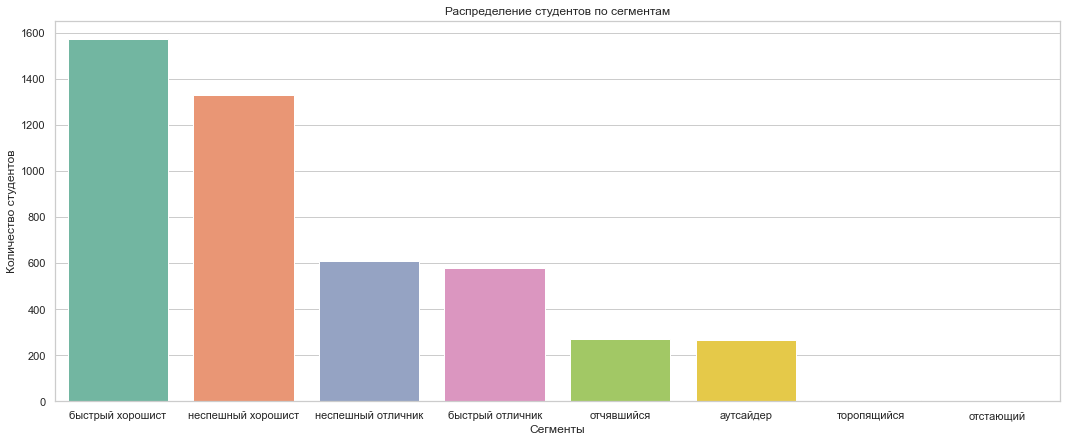

In [63]:
plt.figure(figsize=(18, 7))
sns.barplot(data=rfm_clasters, x="segment", y="student_count", palette="Set2")
plt.title('Распределение студентов по сегментам')
plt.xlabel('Сегменты')
plt.ylabel('Количество студентов')

**Вывод**

- более половины студентов "хорошисты"
- примерно четверть - "отличники"
- по скорости сдачи среди хорошистов и отличников различия незначительны
- менее значительная часть, но ощутимая - это "аутсайдеры" (сдают долго и плохо) и "отчаявшиеся" (студенты, прекратившие попытки после неудачи) - им требуется дополнительная мотивация